In [158]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import f
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv('/Users/PJizzle/Code/Data Mining Project/vgsales.csv')

In [160]:
df = df.drop('NA_Sales', axis=1)

In [161]:
df = df.drop('EU_Sales', axis=1)

In [162]:
df = df.drop('JP_Sales', axis=1)

In [163]:
df

,Year,Genre,Global_Sales,Rank
0,2006.0,Sports,82.74,1
1,1985.0,Platform,40.24,2
2,2008.0,Racing,35.82,3
3,2009.0,Sports,33.00,4
4,1996.0,Role-Playing,31.37,5
5,1989.0,Puzzle,30.26,6
6,2006.0,Platform,30.01,7
7,2006.0,Misc,29.02,8
8,2009.0,Platform,28.62,9
9,1984.0,Shooter,28.31,10


In [164]:
classes = pd.Series(df['Genre'].unique(), name='Genre')

In [165]:
classes

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

In [166]:
classes=classes.to_frame()

In [167]:
type(classes)

pandas.core.frame.DataFrame

In [168]:
classes['Sports'] = (classes['Genre'] == 'Sports') + 0
classes['Platform'] = (classes['Genre'] == 'Platform') + 0
classes['Racing'] = (classes['Genre'] == 'Racing') + 0
classes['Role-Playing'] = (classes['Genre'] == 'Role-Playing') + 0
classes['Puzzle'] = (classes['Genre'] == 'Puzzle') + 0
classes['Misc'] = (classes['Genre'] == 'Misc') + 0
classes['Shooter'] = (classes['Genre'] == 'Shooter') + 0
classes['Simulation'] = (classes['Genre'] == 'Simulation') + 0
classes['Action'] = (classes['Genre'] == 'Action') + 0
classes['Fighting'] = (classes['Genre'] == 'Fighting') + 0
classes['Adventure'] = (classes['Genre'] == 'Adventure') + 0
classes['Strategy'] = (classes['Genre'] == 'Strategy') + 0

In [169]:
df = df.dropna()

In [170]:
df.isnull().values.any()

False

In [171]:
df2 = pd.merge(df, classes)

In [172]:
df2
len(df2)

16327

In [173]:
df_fighting = (df2['Year'] == 2015) & (df2['Genre'] == 'Shooter')
fighting2015 = df2[df_fighting]
type(fighting2015)

pandas.core.frame.DataFrame

In [174]:
fighting2015 = fighting2015.reset_index()


In [175]:
fighting2015.index = fighting2015.index + 1
fighting2015 = fighting2015.reset_index()
fighting2015 = fighting2015.drop('index', axis=1)
fighting2015.head()

,level_0,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,1,2015.0,Shooter,14.24,34,0,0,0,0,0,0,1,0,0,0,0,0
1,2,2015.0,Shooter,7.67,93,0,0,0,0,0,0,1,0,0,0,0,0
2,3,2015.0,Shooter,7.30,102,0,0,0,0,0,0,1,0,0,0,0,0
3,4,2015.0,Shooter,4.57,236,0,0,0,0,0,0,1,0,0,0,0,0
4,5,2015.0,Shooter,4.26,261,0,0,0,0,0,0,1,0,0,0,0,0


In [176]:
X = fighting2015[['level_0']]
X.shape

(34, 1)

In [177]:
df_NoYear = (df2['Year'] < 2015) & (df2['Genre'] == 'Shooter')
df_New = df2[df_NoYear]
type(df_New)
df_New

,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
8158,1984.0,Shooter,28.31,10,0,0,0,0,0,0,1,0,0,0,0,0
8159,2011.0,Shooter,14.76,30,0,0,0,0,0,0,1,0,0,0,0,0
8160,2010.0,Shooter,14.64,32,0,0,0,0,0,0,1,0,0,0,0,0
8162,2012.0,Shooter,14.03,35,0,0,0,0,0,0,1,0,0,0,0,0
8163,2012.0,Shooter,13.73,36,0,0,0,0,0,0,1,0,0,0,0,0
8164,2009.0,Shooter,13.51,37,0,0,0,0,0,0,1,0,0,0,0,0
8165,2011.0,Shooter,13.46,38,0,0,0,0,0,0,1,0,0,0,0,0
8166,2010.0,Shooter,12.73,41,0,0,0,0,0,0,1,0,0,0,0,0
8167,2007.0,Shooter,12.14,44,0,0,0,0,0,0,1,0,0,0,0,0
8168,2009.0,Shooter,10.69,56,0,0,0,0,0,0,1,0,0,0,0,0


In [178]:
y = fighting2015['Global_Sales']

In [179]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
x2_train, x2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X,y)

In [180]:
reg = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

In [181]:
reg.fit(np.log(1+x_train), np.log(y_train))
reg2.fit(np.log(1+x2_train), np.log(y2_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
y_pred = np.exp(reg.predict(np.log(1+x_test)))
y2_pred = np.exp(reg2.predict(np.log(1+x2_test)))

In [183]:
print("variance score: %.2f" % r2_score(y2_test, y2_pred))

variance score: 0.95


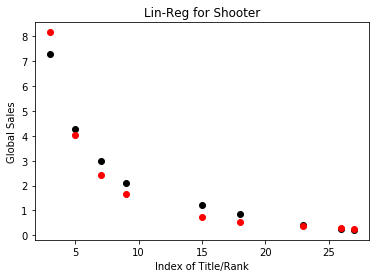

In [184]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, 'o', color='red', linewidth=2)
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.title('Lin-Reg for Shooter')
plt.show()

In [185]:
reg2.coef_

array([-1.64734571])

In [186]:
reg2.intercept_

4.3587716211137213

In [187]:
y2_pred.sort()
y2_pred

array([ 0.22355099,  0.27302485,  0.28817818,  0.34279897,  0.3647877 ,
        0.4464306 ,  1.30378466,  4.08419377,  5.51499629])

In [188]:
y2_test.sort_values(ascending=True)

33    0.05
29    0.18
28    0.20
25    0.27
24    0.34
21    0.41
10    1.79
4     4.26
3     4.57
Name: Global_Sales, dtype: float64